# Ch10. 판다스 스킬업

## 1. groupby 스킬업

### 학습 목표
- `groupby`로 여러 열에 함수를 적용한다.
- `pivot_table`이 아닌 groupby로 그룹 집계를 하는 이유를 이해한다.
- `agg`와 `transform`을 `groupby`와 함께 사용한다.

<img src=https://i.ibb.co/hRFtSTb/groupby.jpg, width=600>


그런데 왜 `pivot_table`을 두고 `groupby`로 집계함수를 적용하는 것일까?
- 실제로는 `groupby`로 집계를 하는 경우가 더 많다
- `groupby`는 `agg`와 `transfrom` 등과 결합해 보다 유용한 집계를 할 수 있다

In [ ]:
# 실습 준비 코드
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 소수점 출력옵션
data = [['이상윤', 'A', '남', 95, 77], ['송중기', 'B', '남', 93, 92], 
        ['김나현', 'B', '여', 88, 60], ['박효신', 'A', '남', 85, 83], 
        ['강승주', 'B', '여', 78, 92], ['권보아', 'A', '여', 72, 75]]
df = pd.DataFrame(data, columns=['이름', '반', '성별', '국어', '수학'])
df

In [ ]:
# groupby로 집계함수 적용하기 복습
df.groupby(['반', '성별'])['국어'].mean()

**groupby 스킬업1**

복수의 열에 `groupby`를 적용하자

In [ ]:
# data도 복수로 지정이 가능하다 (사실 data는 대괄호 인덱싱)
df.groupby(['반', '성별'])[['국어', '수학']].mean()

In [ ]:
# 인덱싱을 하지 않으면 전체에 적용한다 (단 by에 지정된 열은 제외)
df.groupby(['반', '성별', '이름']).mean()

**groupby 스킬업2**

`groupby`로 집계함수를 사용하면 `agg`와 함께 집계함수를 사용가능하다 

**agg의 장점**

1. `agg` 와 리스트를 이용하면 튜플로 집계결과의 열이름을 바꿀 수 있다

2. 복수의 집계함수 사용가능

3. 열마다 다른 집계함수 사용가능

4. lambda 함수 사용가능

1은 `set_axis`등으로 손쉽게 가능하고 2, 4는 `pivot_table`로도 가능하므로 실질적 장점은 3이다

In [ ]:
# 함수를 튜플로 입력해 열 이름을 바꿀 수 있다
df.groupby(['반'])['국어'].agg([('국어평균', 'mean')])

In [ ]:
# 복수의 집계함수 적용
df.groupby(['반'])['국어'].agg(['mean', 'std'])

In [ ]:
# 위 결과는 피벗 테이블로도 가능하다
df.pivot_table('국어', index='반', aggfunc=['mean', 'max']).droplevel(1, axis=1)

In [ ]:
# 복수의 집계함수 일 때도 열 이름을 바꿀 수 있다
df.groupby(['반'])['국어'].agg([('국어평균', 'mean'), ('표준편차','max')])

In [ ]:
# 열마다 다른 집계함수 적용
df.groupby(['반']).agg({'국어': 'mean', '수학': 'count'})

In [ ]:
# lambda 함수도 사용 가능하다. 반별 수학 점수가 90 이상인 인원수
df.groupby(['반'])['수학'].agg(lambda x: (x > 80).sum())

**groupby 스킬업3**

- `transform`과 집계함수를 이용해 집계 결과를 열로 만들수 있다

-  열로 만들수 있으므로 집계 결과로 불리언 인덱싱도 할 수 있다

In [ ]:
# transform은 집계함수의 적용 결과를 원본 df와 같은 길이의 시리즈로 반환한다
df.groupby('반')['수학'].transform('mean')

In [ ]:
# 반평균보다 점수가 높은 학생들의 데이터만 필터링
cond1 = df['수학'] > df.groupby('반')['수학'].transform('mean')
df[cond1]

## 2. apply 스킬업

### 학습 목표
- `apply`와 `map`의 차이점을 알게된다.
- `apply`와 `applymap`의 차이점을 알게된다.

<img src=https://i.ibb.co/XsLBD3W/apply.jpg, width=600>

In [ ]:
# 실습 준비 코드
import pandas as pd
data = [['82점', '81점', '77점'], ['91점', '95점', '83점'], 
         ['78점', '72점', '88점'], ['82점', '87점', '72점']]
s1 = pd.Series(['80점', '75점', '77점', '60점'])
s2 = pd.Series(['4등', '3등', '1등', '2등'], index=list('ABCD'))
s3 = pd.Series(['없음', '사오기', '만원', '2만원'], 
               index=['1등', '2등', '3등', '4등'])
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

apply와 map의 차이

In [ ]:
# 시리즈에 apply 적용하기
s1.apply(lambda x: int(x[:-1]))

In [ ]:
# map 함수는 시리즈에 적용할 때 apply와 유사하다
s1.map(lambda x: int(x[:-1]))

In [ ]:
# apply와 map의 차이점을 알기 위해 s2와 s3를 이용하자
print(s2)
print(s3)

In [ ]:
# map 함수는 함수대신 맵퍼를 입력받을 수 있다
s2.map(s3)

In [ ]:
# apply는 맵퍼를 입력받지 못하지만 lambda 함수로 유사한 기능 가능
s2.apply(lambda x: s3[x])

apply와 applymap의 차이

In [ ]:
# 실습에 쓰일 df 출력
df

In [ ]:
# applymap은 apply와 달리 데이터 프레임도 셀마다 함수를 적용한다
df.applymap(lambda x: int(x[:-1]))

In [ ]:
# 위 결과를 apply로 얻으려면 map 함수를 한번 더 사용해야 한다
df.apply(lambda x: x.map(lambda y: int(y[:-1])))

<img src=https://i.ibb.co/2sMGLVz/10-02.png, width=600>

## 3. 데이터 구조 바꾸기 스킬업

### 학습 목표
- 데이터 프레임의 행과 열을 맞바꾼다. (`transpose` 속성)
- 셀 안의 리스트를 행으로 분리한다. (`explode` 함수)
- `groupby` 함수로 문자열을 합치는 집계를 해본다. (`agg`+파이썬`join` 함수)

> pandas explode

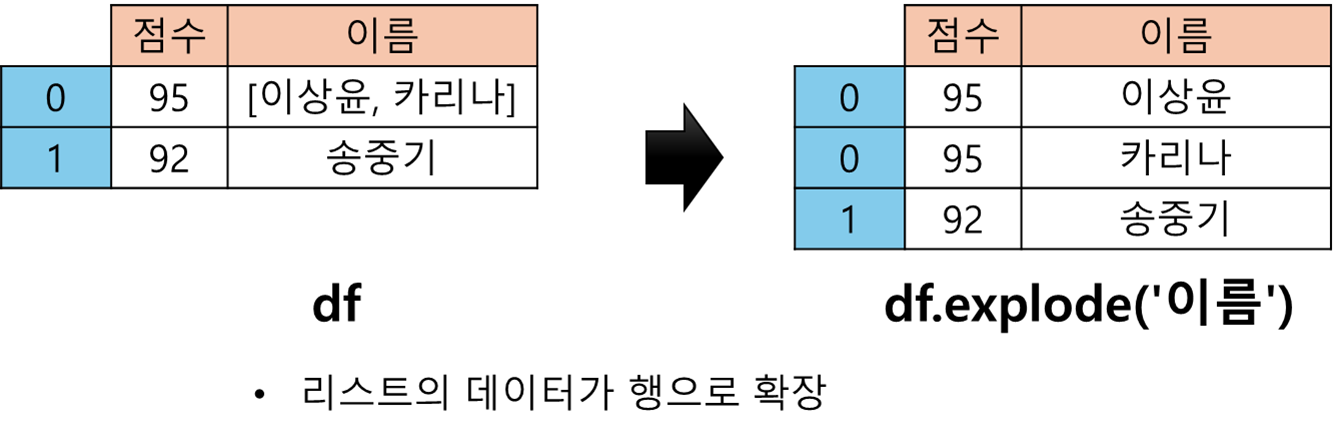

In [ ]:
# 실습 준비 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
df1 = pd.DataFrame([[95, ['이상윤', '카리나']], [92, '송중기']], 
                   columns=['점수', '이름'])
df2 = pd.DataFrame([[95, '이상윤/카리나'], [92, '송중기']], 
                   columns=['점수', '이름'])

In [ ]:
# 실습에 쓰일 df1. df1은 셀에 리스트를 갖고 있다
df1

In [ ]:
# explode 함수로 리스트의 데이터를 분리할 수 있다
df1.explode('이름')

In [ ]:
# 왜 데이터에 리스트가 있는걸까? 보통의 경우 우리가 만드는 것이다
df2

In [ ]:
# 이름열의 /를 분리해서 리스트로 만들고 explode를 사용하면 전처리된다
df2['이름'] = df2['이름'].str.split('/')
df2.explode('이름')

**explode 함수 실습하기**

작품으로 나열된 네이버 웹툰의 데이터를 이용해 작가 중심으로 해당 작가의 작품을 묶어보자

네이버 웹툰 데이터 : https://raw.githubusercontent.com/panda-kim/csv_files/main/naver.csv

In [ ]:
url = './10_01_webtoon.csv'
df_ex1 = pd.read_csv(url, usecols=['title', 'author'])
df_ex1

In [ ]:
df_ex2 = df_ex1.copy()
df_ex2['author'] = df_ex2['author'].str.split(' / ')
df_ex2.explode('author').groupby('author', as_index=False)['title'].agg(' / '.join)

In [ ]:
# join 함수는 시리즈의 문자열을 합치는 함수이다
s = pd.Series(['a', 'bc'])
'/'.join(s)

## 4. 시각화 스킬업

**파이썬 시각화를 학습할 때의 문제점**
- 대부분 시각화 라이브러리를 제대로 쓰려면 matplotlib부터 배워야 한다
- 그래서 정작 그래프는 그리지 않는 matplotlib만 배우고 끝나는 경우가 많다

**판다스의 시각화**
- 데이터 프레임에 바로 함수를 적용해 간단한 코드로 시각화가 가능한 라이브러리들이 많다

  ex) seaborn, pandas-bokeh 
- 다만 꼭 matplotlib가 아니더라도 제대로 쓰려면 여전히 기반 라이브러리를  배워야 한다

  ex) seaborn은 matplotlib 기반, pandas-bokeh는 bokeh 기반

→ 기반 라이브러리를 많이 써야 할 수록 판다스 시각화의 간결함의 장점이 사라진다

**해결책**
- 데이터 프레임에 바로 함수를 적용해 간결한 코드로 판다스의 시각화가 가능하며 
- 가급적 기반 라이브러리를 사용하고 않고 해당 판다스 시각화 라이브러리 자체로 해결이 가능
- 반응형 그래프를 그릴 수 있는 라이브러리

위와 같은 라이브러리라면 간결하고 예쁜 시각화가 손쉽게 가능하다

-> pyechart 기반의 pandasecharts를 배워보자

**pyecharts**

echarts를 python에서 사용할 수 있게 해주는 라이브러리

- 기본값이 예쁘다
- 반응형이다

pyecharts 사이트 링크 : https://pyecharts.org/#/en-us/

갤러리 링크 : https://gallery.pyecharts.org/#/README_EN

pyecharts 설치 (1.9.1버전 설치)

```python
!pip install --upgrade pyecharts==1.9.1
```

**pandasecharts**

데이터 프레임에 pyecharts를 쉽게 사용하게 해주는 라이브러리




pandasecharts 설치

```python
!pip install pandasecharts
```


In [ ]:
# pyecharts 1.9.1 설치
!pip install --upgrade pyecharts==1.9.1

In [ ]:
# pandasecharts 설치
!pip install pandasecharts

In [ ]:
# 실습 준비코드
import pandas as pd
from pyecharts.globals import ThemeType
from pyecharts.charts import Timeline
from pandasecharts import echart
import IPython
data1 = [['카리나', 98, 72], ['이상윤', 89, 91], 
         ['박효신', 77, 78], ['손승연', 62, 93]]
data2 = [['카리나', 72, 79], ['이상윤', 83, 81], 
         ['박효신', 74, 87], ['손승연', 92, 89]]
df1 = pd.DataFrame(data1, columns=['이름', '국어', '영어'])
df2 = pd.DataFrame(data2, columns=['이름', '국어', '영어'])

In [ ]:
# bar 그래프 그리기(render.html 파일로 저장)
df1.echart.bar(x='이름', ys=['국어', '영어']).render()
# IPython.display.HTML(filename='/content/render.html') # 코랩에서 출력

In [ ]:
# 저장 파일명 바꾸기
df1.echart.bar(x='이름', ys=['국어', '영어']).render('파일명.html')
# IPython.display.HTML(filename='/content/파일명.html') # 코랩에서 출력

In [ ]:
# 크기 변경
df1.echart.bar(x='이름', ys=['국어', '영어'], figsize=(600,400)).render()
# IPython.display.HTML(filename='/content/render.html') # 코랩에서 출력

In [ ]:
# 국어열의 값에 따라 정렬
df1.echart.bar(x='이름', ys=['국어', '영어'], sort='국어', figsize=(600,400)).render()
# IPython.display.HTML(filename='/content/render.html') # 코랩에서 출력

In [ ]:
# 제목 생성
df1.echart.bar(x='이름', ys=['국어', '영어'], title='중간고사', 
               figsize=(600,400)).render()
# IPython.display.HTML(filename='/content/render.html') # 코랩에서 출력

In [ ]:
# 소제목(subtitle) 생성
df1.echart.bar(x='이름', ys=['국어', '영어'], title='중간고사', 
               subtitle='누가누가잘했나', figsize=(600,400)).render()
# IPython.display.HTML(filename='/content/render.html') # 코랩에서 출력

In [ ]:
# 수치 표현하기
df1.echart.bar(x='이름', ys=['국어', '영어'], title='중간고사', 
               subtitle='누가누가잘했나', label_show=True, figsize=(600,400)).render()
# IPython.display.HTML(filename='/content/render.html') # 코랩에서 출력

**pyecharts 테마**
- LIGHT
- DARK
- CHALK
- ESSOS
- INFOGRAPHIC
- MACARONS
- PURPLE_PASSION
- ROMA
- ROMANTIC
- SHINE
- VINTAGE

다음 링크로 테마를 확인해볼 수 있다: https://pyecharts.org/#/en-us/themes?id=theme-style

In [ ]:
# 테마 변경
df1.echart.bar(x='이름', ys=['국어', '영어'], title='중간고사', figsize=(600,400), 
               subtitle='누가누가 잘했나', theme=ThemeType.DARK).render()
# IPython.display.HTML(filename='/content/render.html')

In [ ]:
# 함수 및 인자 정리
(df1
 .echart.bar(x='이름', 
             ys=['국어', '영어'],
             sort='영어',  
             title='중간고사', 
             subtitle='결과', 
             figsize=(600,400), 
             theme=ThemeType.DARK
             )
 .render()
 )
# IPython.display.HTML(filename='/content/render.html')

In [ ]:
# 타임라인
tl = Timeline({'width':'600px', 'height':'400px'})
bar1 = df1.echart.bar(x='이름', ys=['국어', '영어'], title='1학기', subtitle='중간고사')
bar2 = df2.echart.bar(x='이름', ys=['국어', '영어'], title='1학기', subtitle='기말고사')
tl.add(bar1, '중간고사').add(bar2, '기말고사').render()
# IPython.display.HTML(filename='/content/render.html')